### creat uvmap

In [1]:
import torch
import cv2
import argparse
from dataset.data_utils import ResizeCrop, ToTensor
import numpy as np
import os
import sys
from tqdm import tqdm
import os


class Demo:
    def __init__(self, model_path, z_size = 1024):
        
        print(model_path)
        
        self.model = torch.load(model_path)
        
        
        self.model.eval()
        self.z_size = z_size


    def generate_texture(self, img_path):
        
        img = cv2.imread(img_path)
        
        if img is None or img.shape[0] <= 0 or img.shape[1] <= 0:
            return 0, 0
        
        img = cv2.resize(img, (64, 128))
        img = (img / 225. - 0.5) * 2.0
        img = torch.from_numpy(img).permute(2, 0, 1).float().unsqueeze(0)
        
        out = self.model(img)
        out = out.cpu().detach().numpy()[0]
        out = out.transpose((1, 2, 0))
        out = (out / 2.0 + 0.5) * 255.
        out = out.astype(np.uint8)
        out = cv2.resize(out, dsize=(64, 64))
        
        return out, 1
       

In [2]:
Sub_Dir = ['bounding_box_train','bounding_box_test','query']
uvmap_Data_Dir_out = '/unsullied/sharefs/zhongyunshan/isilon-home/datasets/Texture/market-uvmap-onlyTrain/'
Market_Data_Dir = '/unsullied/sharefs/wangjian02/isilon-home/datasets/Market1501/data'

model_path = '/unsullied/sharefs/zhongyunshan/isilon-home/model-parameters/Texture/PCB_2048_256_L1_onlyTrain2018-10-13_13:36:31.201739/2018-10-13_15:33:44.139917_epoch_100'


demo = Demo(model_path)

/unsullied/sharefs/zhongyunshan/isilon-home/model-parameters/Texture/PCB_2048_256_L1_onlyTrain2018-10-13_13:36:31.201739/2018-10-13_15:33:44.139917_epoch_100


In [4]:
for p in Sub_Dir:
    
    img_path = os.path.join(Market_Data_Dir,p)
    out_path = os.path.join(uvmap_Data_Dir_out,p)
    
    for root, dirs, files in os.walk(img_path, topdown=False):
        input_imgs = files
    
    print('sub dir:',p)
    print('img_path',img_path)
    print('out_path',out_path)
    print('len of input images',len(input_imgs))
    
    
    
    
    for name in tqdm(input_imgs):
        full_path = os.path.join(img_path, name)
        
        out, flag = demo.generate_texture(img_path=full_path)
        if flag == 0:
            continue
        cv2.imwrite(os.path.join(out_path, name), out)

  0%|          | 0/12937 [00:00<?, ?it/s]/home/zhongyunshan/.local/lib/python3.5/site-packages/torch/nn/modules/upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
  0%|          | 5/12937 [00:00<04:51, 44.34it/s]

sub dir: bounding_box_train
img_path /unsullied/sharefs/wangjian02/isilon-home/datasets/Market1501/data/bounding_box_train
out_path /unsullied/sharefs/zhongyunshan/isilon-home/datasets/Texture/market-uvmap-onlyTrain/bounding_box_train
len of input images 12937


  0%|          | 4/19733 [00:00<10:21, 31.73it/s]

sub dir: bounding_box_test
img_path /unsullied/sharefs/wangjian02/isilon-home/datasets/Market1501/data/bounding_box_test
out_path /unsullied/sharefs/zhongyunshan/isilon-home/datasets/Texture/market-uvmap-onlyTrain/bounding_box_test
len of input images 19733


  0%|          | 4/3369 [00:00<01:35, 35.23it/s]

sub dir: query
img_path /unsullied/sharefs/wangjian02/isilon-home/datasets/Market1501/data/query
out_path /unsullied/sharefs/zhongyunshan/isilon-home/datasets/Texture/market-uvmap-onlyTrain/query
len of input images 3369


100%|██████████| 3369/3369 [01:52<00:00, 29.93it/s]


### test uvmap

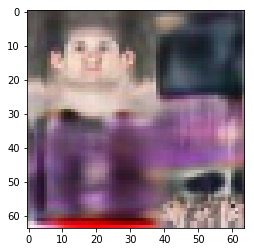

In [87]:
from utils.imdecode import imdecode
from matplotlib import pyplot as plt

import pickle
import cv2

img_path = "/unsullied/sharefs/zhongyunshan/isilon-home/datasets/Texture/market-uvmap-onlyTrain/query/0025_c3s1_002001_00.jpg"



img = cv2.imread(os.path.join(img_path))


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [54]:
with open('/unsullied/sharefs/zhongyunshan/isilon-home/datasets/Texture/frames_mat.pkl','rb') as f:
    pkl = pickle.load(f)

In [56]:
pkl[1][0]

['1000770,2fc490002f071f70',
 1.0,
 '/unsullied/sharefs/zhongyunshan/isilon-home/datasets/Texture/PRW/frames/c3s1_123358.jpg']

In [62]:
raw = nf.get(pkl[1][0][0])

img,bbox = pickle.loads(raw)

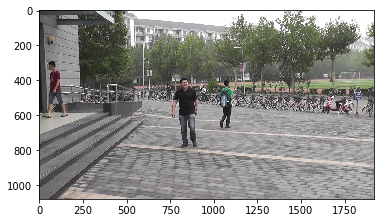

In [63]:


img = img[:, :, ::-1]
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [64]:
with open('/unsullied/sharefs/zhongyunshan/isilon-home/datasets/Texture/Market_all.pkl','rb') as f:
    pkl = pickle.load(f)

'116239,229000d50da5d8'

In [69]:



market_img = nf.get(pkl['YjYxh7oVQP6uohqp0ZqdNA']['nori_id'][0])
texture_img = imdecode(market_img)





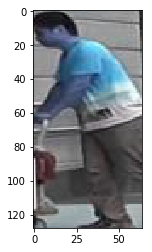

In [70]:


#img = img[:, :, ::-1]
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(texture_img)

In [6]:
import pickle
import nori2 as nori
from utils.imdecode import imdecode
from matplotlib import pyplot as plt
import cv2

In [3]:
with open('/unsullied/sharefs/zhangxuan/isilon-home/nori_pkls/pub/201809_private_with_reids_115300.pkl','rb') as f:
    pkl = pickle.load(f)

In [39]:
len(pkl[pid])

21

In [44]:
from numpy.random import RandomState

rng = RandomState()

rng.choice(len(pkl[pid]), 4, replace=(len(pkl[pid]) < 4))

array([ 9,  3, 12, 13])

In [45]:
pkl[pid][9]

['885524,7aa4000c910d9f9',
 406.76568603515625,
 639.7321166992188,
 645.7070922851562,
 727.4837036132812,
 '201809']

nori2.nori_fetcher - WARNING - Nori fetcher should indicate files explicitly to prevent forgetting the location of used files.
nori2.nori_fetcher - WARNING - Nori fetcher should indicate files explicitly to prevent forgetting the location of used files.
nori2.nori_fetcher - WARNING - Nori fetcher should indicate files explicitly to prevent forgetting the location of used files.
nori2.nori_fetcher - WARNING - Nori fetcher should indicate files explicitly to prevent forgetting the location of used files.
nori2.nori_fetcher - WARNING - Nori fetcher should indicate files explicitly to prevent forgetting the location of used files.
nori2.nori_fetcher - WARNING - Nori fetcher should indicate files explicitly to prevent forgetting the location of used files.
nori2.nori_fetcher - WARNING - Nori fetcher should indicate files explicitly to prevent forgetting the location of used files.
nori2.nori_fetcher - WARNING - Nori fetcher should indicate files explicitly to prevent forgetting the location

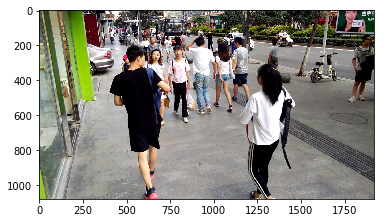

In [32]:

pid = '---BY8NtTIKtmJthsrpaAQ'
idx = 1


nf = nori.Fetcher()

raw = nf.get(pkl[pid][idx][0])
raw = imdecode(raw)


img = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
plt.imshow(img)


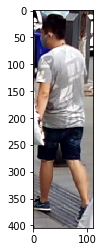

In [46]:
bbox = pkl[pid][idx][1:]



ymin = int(bbox[0])
ymax = int(bbox[1])
xmin = int(bbox[2])
xmax = int(bbox[3])


plt.imshow(img[ymin:ymax, xmin:xmax])


In [31]:
a = list(sorted(pkl.keys()))

In [34]:
len(pkl)

115300

In [35]:
c = 0

for k,v in pkl.items():
    c+=len(v)
print(c)

2308204


In [37]:
len(a)

115300